## Load Modules

In [130]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import math


## Load Datasets

In [131]:
# Define the data path
home_dir = os.path.expanduser("~")
data_path = os.path.join(home_dir, "Documents/work/data/bevel-columns/output")

# Check if the path exists
if not os.path.exists(data_path):
    print(f"Error: Path {data_path} does not exist.")
    
# Find all directories in the path
subdirs = [d for d in os.listdir(data_path) 
           if os.path.isdir(os.path.join(data_path, d))]

print(f"Found {len(subdirs)} directories in {data_path}")

# Function to load mueller_scatgrid files
def load_mueller_data(file_path):
    """
    Load mueller_scatgrid data file containing 18 columns:
    - columns 0-1: theta and phi
    - columns 2-17: Mueller matrix elements
    
    Returns: numpy array with the data
    """
    try:
        data = np.loadtxt(file_path)
        # Check if the file has the expected number of columns (18)
        if data.shape[1] != 18:
            print(f"Warning: {file_path} has {data.shape[1]} columns, expected 18")
        return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Dictionary to store mueller data for each directory
mueller_data = {}

# Iterate through subdirectories and load the data
for subdir in subdirs:
    full_path = os.path.join(data_path, subdir)
    mueller_file = os.path.join(full_path, "mueller_scatgrid")
    
    if os.path.exists(mueller_file):
        data = load_mueller_data(mueller_file)
        if data is not None:
            mueller_data[subdir] = data
            print(f"Loaded data from {subdir}, shape: {data.shape}")
    else:
        print(f"File not found: {mueller_file}")

print(f"\nLoaded data from {len(mueller_data)} directories")

# Display a summary of the first file if any were loaded
if mueller_data:
    first_key = list(mueller_data.keys())[0]
    first_data = mueller_data[first_key]
    
    print(f"\nSample data from {first_key}:")
    print("First few rows:")
    print(first_data[:3, :])
    
    print("\nData columns meaning:")
    print("Columns 0-1: theta and phi")
    print("Columns 2-17: Mueller matrix elements M11, M12, ..., M44")
    
    # Calculate some basic statistics for the first dataset
    print(f"\nTheta range: {first_data[:,0].min()} to {first_data[:,0].max()} degrees")
    print(f"Phi range: {first_data[:,1].min()} to {first_data[:,1].max()} degrees")

Found 7 directories in /Users/ixguard/Documents/work/data/bevel-columns/output
Loaded data from run_1, shape: (46879, 18)
Loaded data from run_2, shape: (46879, 18)
Loaded data from run_3, shape: (46879, 18)
Loaded data from run_4, shape: (46879, 18)
Loaded data from run_5, shape: (46879, 18)
Loaded data from run_6, shape: (46879, 18)
Loaded data from run_7, shape: (46879, 18)

Loaded data from 7 directories

Sample data from run_1:
First few rows:
[[ 0.00000000e+00  0.00000000e+00  8.51775400e+07  4.11047600e+03
  -3.67700590e+03 -3.06909960e+03  4.14692970e+03  8.51359600e+07
  -2.62928500e+04 -1.62101650e+03 -3.65187620e+03  2.63705550e+04
   8.51359440e+07  1.00584033e+03 -3.06665300e+03  1.69273200e+03
  -1.03273190e+03  8.51734700e+07]
 [ 0.00000000e+00  2.00000000e+00  8.51775400e+07  3.84398400e+03
  -3.95477690e+03 -3.06909720e+03  3.88210300e+03  8.51359760e+07
  -2.62947560e+04 -1.54690400e+03 -3.93225320e+03  2.63686200e+04
   8.51359440e+07  1.11643820e+03 -3.06665110e+03 

## Load 1D Mueller File

In [132]:
# Function to load 1D mueller_scatgrid_1d files
def load_mueller_1d_data(file_path):
    """
    Load mueller_scatgrid_1d data file containing 17 columns:
    - column 0: theta (phi has been integrated out)
    - columns 1-16: Mueller matrix elements
    
    Returns: numpy array with the data
    """
    try:
        data = np.loadtxt(file_path)
        # Check if the file has the expected number of columns (17)
        if data.shape[1] != 17:
            print(f"Warning: {file_path} has {data.shape[1]} columns, expected 17")
        return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Dictionary to store 1D mueller data for each directory
mueller_1d_data = {}

# Iterate through subdirectories and load the 1D data
for subdir in subdirs:
    full_path = os.path.join(data_path, subdir)
    mueller_1d_file = os.path.join(full_path, "mueller_scatgrid_1d")
    
    if os.path.exists(mueller_1d_file):
        data = load_mueller_1d_data(mueller_1d_file)
        if data is not None:
            mueller_1d_data[subdir] = data
            print(f"Loaded 1D data from {subdir}, shape: {data.shape}")
    else:
        print(f"1D file not found: {mueller_1d_file}")

print(f"\nLoaded 1D data from {len(mueller_1d_data)} directories")

# Display a summary of the first 1D file if any were loaded
if mueller_1d_data:
    first_key = list(mueller_1d_data.keys())[0]
    first_1d_data = mueller_1d_data[first_key]
    
    print(f"\nSample 1D data from {first_key}:")
    print("First few rows:")
    print(first_1d_data[:3, :])
    
    print("\nData columns meaning:")
    print("Column 0: theta (phi integrated out)")
    print("Columns 1-16: Mueller matrix elements M11, M12, ..., M44")
    
    # Calculate some basic statistics for the first 1D dataset
    print(f"\nTheta range: {first_1d_data[:,0].min()} to {first_1d_data[:,0].max()} degrees")
    
    # Check if the first row is consistent with forward scattering (should be at theta=0)
    if abs(first_1d_data[0,0]) < 1e-6:
        print("\nFirst row corresponds to forward scattering (theta ≈ 0°)")
    
    # Check if the last row is consistent with backward scattering (should be at theta=180)
    if abs(first_1d_data[-1,0] - 180) < 1e-6:
        print("Last row corresponds to backward scattering (theta ≈ 180°)")

Loaded 1D data from run_1, shape: (259, 17)
Loaded 1D data from run_2, shape: (259, 17)
Loaded 1D data from run_3, shape: (259, 17)
Loaded 1D data from run_4, shape: (259, 17)
Loaded 1D data from run_5, shape: (259, 17)
Loaded 1D data from run_6, shape: (259, 17)
Loaded 1D data from run_7, shape: (259, 17)

Loaded 1D data from 7 directories

Sample 1D data from run_1:
First few rows:
[[ 0.0000000e+00  5.3518646e+08  2.3728943e-01  4.7683716e-03
  -1.9283637e+04  2.4366760e-01  5.3492474e+08 -1.6544711e+05
  -6.2103270e-03  7.9650880e-03  1.6544711e+05  5.3492470e+08
  -1.0646820e-02 -1.9268271e+04  4.0817260e-03  8.0299380e-03
   5.3516077e+08]
 [ 1.0000000e-01  5.2735427e+08 -1.0965219e+03 -6.2166122e+01
  -2.3229092e+04 -1.0963716e+03  5.2710022e+08 -1.5708548e+05
   2.3082428e+00 -6.2082794e+01  1.5708530e+05  5.2710020e+08
  -3.7894434e+02 -2.3213148e+04  2.4396667e+00  3.7771960e+02
   5.2732864e+08]
 [ 2.0000000e-01  5.0475334e+08 -4.2179040e+03 -2.8762375e+02
  -2.2444535e+04 -4

## Load Results File

In [133]:
# Function to parse results.dat files
def parse_results_file(file_path):
    """
    Parse a results.dat file and extract key scattering parameters:
    - Scattering Cross Section
    - Extinction Cross Section
    - Single Scattering Albedo
    - Asymmetry Parameter
    
    Returns: Dictionary with parameter names and values
    """
    try:
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Extract key parameters using regular expressions
        scat_cs_match = re.search(r'Scattering Cross Section:\s+([0-9.]+)', content)
        ext_cs_match = re.search(r'Extinction Cross Section:\s+([0-9.]+)', content)
        ssa_match = re.search(r'Single Scattering Albedo:\s+([0-9.]+)', content)
        asym_match = re.search(r'Asymmetry Parameter:\s+([0-9.]+)', content)
        
        results = {}
        
        if scat_cs_match:
            results['scattering_cs'] = float(scat_cs_match.group(1))
        
        if ext_cs_match:
            results['extinction_cs'] = float(ext_cs_match.group(1))
        
        if ssa_match:
            results['ssa'] = float(ssa_match.group(1))
        
        if asym_match:
            results['asymmetry'] = float(asym_match.group(1))
        
        return results
    except Exception as e:
        print(f"Error parsing results file {file_path}: {e}")
        return {}

# Dictionary to store scattering parameter data for each directory
scattering_params = {}

# Iterate through subdirectories and load the results.dat data
for subdir in subdirs:
    full_path = os.path.join(data_path, subdir)
    results_file = os.path.join(full_path, "results.dat")
    
    if os.path.exists(results_file):
        params = parse_results_file(results_file)
        if params:
            scattering_params[subdir] = params
            print(f"Loaded scattering parameters from {subdir}")
    else:
        print(f"Results file not found: {results_file}")

print(f"\nLoaded scattering parameters from {len(scattering_params)} directories")

# Display a summary of the scattering parameters
if scattering_params:
    print("\nScattering parameter summary:")
    print("{:<15} {:<20} {:<20} {:<20} {:<20}".format(
        "Directory", "Scattering CS", "Extinction CS", "SSA", "Asymmetry"))
    print("-" * 95)
    
    for subdir, params in scattering_params.items():
        print("{:<15} {:<20.6f} {:<20.6f} {:<20.6f} {:<20.6f}".format(
            subdir[:14],
            params.get('scattering_cs', float('nan')),
            params.get('extinction_cs', float('nan')),
            params.get('ssa', float('nan')),
            params.get('asymmetry', float('nan'))
        ))

Loaded scattering parameters from run_1
Loaded scattering parameters from run_2
Loaded scattering parameters from run_3
Loaded scattering parameters from run_4
Loaded scattering parameters from run_5
Loaded scattering parameters from run_6
Loaded scattering parameters from run_7

Loaded scattering parameters from 7 directories

Scattering parameter summary:
Directory       Scattering CS        Extinction CS        SSA                  Asymmetry           
-----------------------------------------------------------------------------------------------
run_1           776.400696           776.400696           1.000000             0.780802            
run_2           784.689575           784.689575           1.000000             0.780439            
run_3           774.320190           774.320190           1.000000             0.784933            
run_4           787.327942           787.327942           1.000000             0.790788            
run_5           769.213623           769.213

## Automatic Filename Parsing

In [134]:
# Function to parse command executed files with improved handling for specific parameters
def parse_command_file_improved(file_path):
    """
    Parse a command_executed.txt file and extract the command line parameters.
    Ignores --dir parameter and extracts only basename from --geo parameter.
    
    Returns: Dictionary with parameter names and values
    """
    try:
        with open(file_path, 'r') as f:
            command = f.read().strip()
        
        # Find the part after "goad" in the command
        match = re.search(r'goad\s+(.*)', command)
        if not match:
            print(f"Could not find 'goad' in command: {command}")
            return {}
        
        params_str = match.group(1)
        
        # Parse parameters
        params = {}
        i = 0
        skip_next = False
        
        while i < len(params_str):
            # Match parameter names (starting with - or --)
            param_match = re.search(r'(-{1,2}[a-zA-Z0-9]+)(?:\s+([^-][^\s]*)|)', params_str[i:])
            if not param_match:
                break
            
            param_name = param_match.group(1)
            param_value = param_match.group(2) if param_match.group(2) else True
            
            # Skip --dir parameter
            if param_name == "--dir":
                i += param_match.end()
                
                # Also skip the directory value that follows
                if not skip_next:
                    dir_match = re.search(r'\s+([^\s]+)', params_str[i:])
                    if dir_match:
                        i += dir_match.end()
                continue
            
            # Extract only basename from --geo parameter and remove file extension
            if param_name == "--geo" and isinstance(param_value, str):
                param_value = os.path.splitext(os.path.basename(param_value))[0]
            
            # Convert numeric values from strings
            if isinstance(param_value, str):
                try:
                    if '.' in param_value:
                        param_value = float(param_value)
                    else:
                        param_value = int(param_value)
                except ValueError:
                    pass
            
            params[param_name] = param_value
            i += param_match.end()
        
        return params
    except Exception as e:
        print(f"Error parsing command file {file_path}: {e}")
        return {}

# Dictionary to store parsed command parameters for each directory
command_params_improved = {}

# Iterate through subdirectories to load command files with the improved parser
for subdir in subdirs:
    full_path = os.path.join(data_path, subdir)
    command_file = os.path.join(full_path, "command_executed.txt")
    
    if os.path.exists(command_file):
        params = parse_command_file_improved(command_file)
        if params:
            command_params_improved[subdir] = params
            print(f"Parsed command from {subdir}, found {len(params)} parameters")
    else:
        print(f"Command file not found: {command_file}")

print(f"\nParsed commands from {len(command_params_improved)} directories")

# Find which parameters vary between runs and which are constant
if len(command_params_improved) > 1:
    # Collect all parameter names
    all_params = set()
    for params in command_params_improved.values():
        all_params.update(params.keys())
    
    # Check which parameters vary
    varying_params = {}
    constant_params = {}
    
    for param in all_params:
        values = [params.get(param) for params in command_params_improved.values() 
                  if param in params]
        
        if len(set(values)) > 1:
            varying_params[param] = values
        else:
            if values:  # Make sure there's at least one value
                constant_params[param] = values[0]
    
    print("\nVarying parameters between datasets:")
    for param, values in varying_params.items():
        unique_values = sorted(set(values))
        print(f"{param}: {unique_values}")
    
    print("\nConstant parameters across all datasets:")
    for param, value in constant_params.items():
        print(f"{param}: {value}")
    
    # Create better labels for the datasets based on varying parameters
    dataset_labels = {}
    for subdir in command_params_improved.keys():
        label_parts = []
        for param in sorted(varying_params.keys()):
            if param in command_params_improved[subdir]:
                value = command_params_improved[subdir][param]
                # Format the parameter name without dashes
                param_name = param.lstrip('-')
                label_parts.append(f"{param_name}={value}")
        
        if label_parts:
            dataset_labels[subdir] = ", ".join(label_parts)
        else:
            dataset_labels[subdir] = subdir
    
    print("\nDataset labels based on varying parameters:")
    for subdir, label in dataset_labels.items():
        print(f"{subdir}: {label}")
else:
    print("Need more than one dataset to compare parameter variations")

Parsed command from run_1, found 10 parameters
Parsed command from run_2, found 10 parameters
Parsed command from run_3, found 10 parameters
Parsed command from run_4, found 10 parameters
Parsed command from run_5, found 10 parameters
Parsed command from run_6, found 10 parameters
Parsed command from run_7, found 10 parameters

Parsed commands from 7 directories

Varying parameters between datasets:
--geo: ['column_bevel0', 'column_bevel0.5', 'column_bevel1', 'column_bevel2', 'column_bevel3', 'column_bevel4', 'column_bevel5']

Constant parameters across all datasets:
--baf: 0.1
-w: 0.532
--rec: 10
--bp: 0.005
--cop: 0.99
-s: 12345
--uniform: 25000
--distortion: 0.0
--tir: 10

Dataset labels based on varying parameters:
run_1: geo=column_bevel0.5
run_2: geo=column_bevel0
run_3: geo=column_bevel1
run_4: geo=column_bevel2
run_5: geo=column_bevel3
run_6: geo=column_bevel4
run_7: geo=column_bevel5


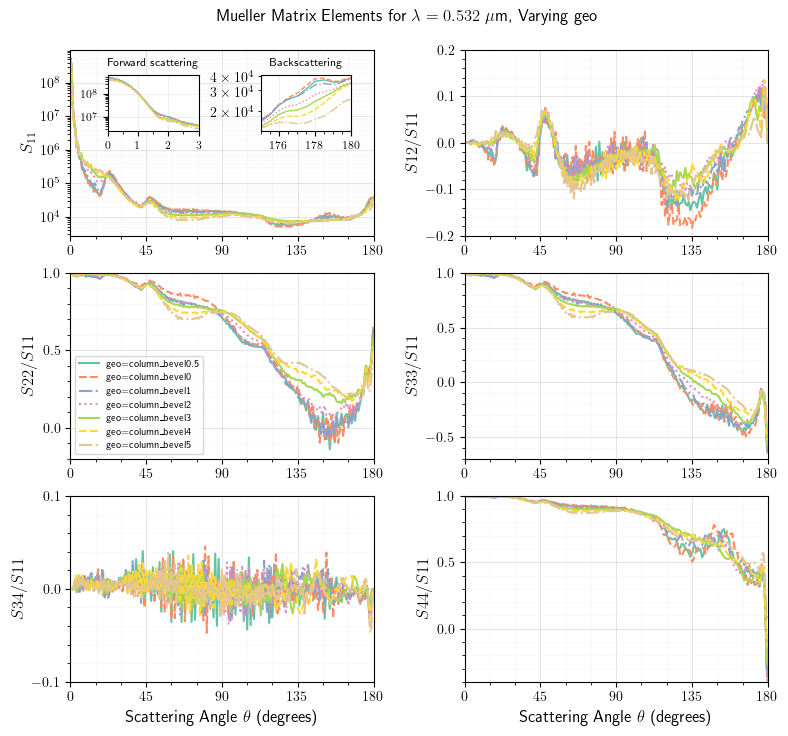

In [135]:
# Create a plot of multiple Mueller matrix elements from the 1D data
# Use LaTeX font
plt.rcParams.update({'text.usetex': True})

# Figure font config
label_font = {'fontfamily': 'Arial Black', 'fontsize': 12}
title_font = {'fontfamily': 'Arial Black', 'fontsize': 16}
subfig_title_font = {'fontfamily': 'Arial Black', 'fontsize': 12}

# Create figure with 2x3 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(9, 8))
axs = axs.flatten()  # Flatten to easily iterate through all axes

# Create an inset axes for S11 forward scattering region (0-3 degrees)
axins_forward = inset_axes(axs[0], width="30%", height="30%", loc="upper left",
                   bbox_to_anchor=(0.1, -0.1, 1, 1), bbox_transform=axs[0].transAxes)

# Create an inset axes for S11 backscattering region (175-180 degrees)
axins_backward = inset_axes(axs[0], width="30%", height="30%", loc="upper right",
                   bbox_to_anchor=(-0.05, -0.1, 1, 1), bbox_transform=axs[0].transAxes)

# Plot colors and styles
colors = cm.Set2.colors
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']

# Element names and column indices (0-based)
elements = {
    'S11': 1,           # Element is in column 1 (2nd column)
    'S12/S11': 2,       # S12 is in column 2 (3rd column)
    'S22/S11': 6,       # S22 is in column 6 (7th column)
    'S33/S11': 11,      # S33 is in column 11 (12th column)
    'S34/S11': 12,      # S34 is in column 12 (13th column)
    'S44/S11': 16       # S44 is in column 16 (17th column)
}

# Get parameter that varies for title
if len(varying_params) > 0:
    varying_param_name = next(iter(sorted(varying_params.keys()))).lstrip('-')
else:
    varying_param_name = "Dataset"

# Create overall figure title from constant parameters
if 'constant_params' in locals() and constant_params:
    # Get wavelength if available
    wavelength = constant_params.get('-w', constant_params.get('--w', None))
    wavelength_str = f"$\\lambda = {wavelength}$ $\\mu$m, " if wavelength else ""
    
    # Get geometry file if available
    geo_file = constant_params.get('--geo', None)
    geo_str = f"{geo_file}, " if geo_file else ""
    
    fig_title = f"Mueller Matrix Elements for {geo_str}{wavelength_str}Varying {varying_param_name}"
else:
    fig_title = "Mueller Matrix Comparison"

# Dictionary to store min and max values for each element ratio
ratio_bounds = {element: {'min': float('inf'), 'max': float('-inf')} for element in elements.keys() if element != 'S11'}

# First pass to determine actual data ranges for improved y-axis limits
for element_name, col_idx in elements.items():
    if element_name != 'S11':  # Skip S11, we'll use log scale
        for subdir, data in mueller_1d_data.items():
            theta = data[:, 0]
            element = data[:, col_idx]
            s11 = data[:, elements['S11']]
            ratio = element / s11
            
            ratio_bounds[element_name]['min'] = min(ratio_bounds[element_name]['min'], np.nanmin(ratio))
            ratio_bounds[element_name]['max'] = max(ratio_bounds[element_name]['max'], np.nanmax(ratio))

# Add overall title to the figure with reduced space (using smaller y value)
fig.suptitle(fig_title, fontdict=title_font, y=0.95)

# Store the legend handles and labels for later
legend_handles = []
legend_labels = []

# Plot each element
for i, (element_name, col_idx) in enumerate(elements.items()):
    ax = axs[i]
    
    # Plot data for each dataset
    for j, (subdir, data) in enumerate(mueller_1d_data.items()):
        if j >= len(colors):
            color_idx = j % len(colors)
        else:
            color_idx = j
            
        if j >= len(line_styles):
            ls_idx = j % len(line_styles)
        else:
            ls_idx = j
        
        # Extract theta and the requested element
        theta = data[:, 0]
        element = data[:, col_idx]
        
        # Use dataset label if available, otherwise use directory name
        if 'dataset_labels' in locals() and subdir in dataset_labels:
            label = dataset_labels[subdir]
        else:
            label = subdir
        
        # For S11, plot on log scale
        if element_name == 'S11':
            # Main plot
            line, = ax.semilogy(theta, element, 
                      color=colors[color_idx], 
                      linestyle=line_styles[ls_idx], 
                      linewidth=1.5,
                      label=label)
            
            # Store handles and labels from the first element for the legend
            if i == 0:
                legend_handles.append(line)
                legend_labels.append(label)
            
            # Forward scattering inset plot (0-3 degrees)
            forward_mask = (theta >= 0) & (theta <= 3)
            if np.any(forward_mask):
                axins_forward.semilogy(theta[forward_mask], element[forward_mask],
                             color=colors[color_idx],
                             linestyle=line_styles[ls_idx],
                             linewidth=1)
                
            # Backward scattering inset plot (175-180 degrees)
            backward_mask = (theta >= 175) & (theta <= 180)
            if np.any(backward_mask):
                axins_backward.semilogy(theta[backward_mask], element[backward_mask],
                              color=colors[color_idx],
                              linestyle=line_styles[ls_idx],
                              linewidth=1)
        else:
            # For other elements, plot the ratio to S11
            s11 = data[:, elements['S11']]  
            ratio = element / s11  # Calculate ratio to S11
            
            ax.plot(theta, ratio, 
                   color=colors[color_idx], 
                   linestyle=line_styles[ls_idx], 
                   linewidth=1.5)
    
    # Set x-axis label only for bottom row
    if i >= 4:
        ax.set_xlabel(r'Scattering Angle $\theta$ (degrees)', fontdict=label_font)
    
    # Set y-axis label
    if element_name == 'S11':
        ax.set_ylabel(r'$S_{11}$', fontdict=label_font)
    else:
        ax.set_ylabel(f'${element_name}$', fontdict=label_font)
    
    # Configure ticks and axis limits
    ax.set_xlim(0, 180)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(45))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(15))
    
    # For S11, use log scale
    if element_name == 'S11':
        ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=6))
        
        # Configure forward scattering inset axes
        axins_forward.set_xlim(0, 3)
        axins_forward.xaxis.set_major_locator(ticker.MultipleLocator(1))
        axins_forward.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        axins_forward.grid(True, alpha=0.2)
        axins_forward.tick_params(axis='both', which='major', labelsize=8)
        axins_forward.set_title("Forward scattering", fontsize=8)
        
        # Configure backward scattering inset axes
        axins_backward.set_xlim(175, 180)
        axins_backward.xaxis.set_major_locator(ticker.MultipleLocator(2))
        axins_backward.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        axins_backward.grid(True, alpha=0.2)
        axins_backward.tick_params(axis='both', which='major', labelsize=8)
        axins_backward.set_title("Backscattering", fontsize=8)
        
    else:
        # Set improved y-axis limits for ratio plots
        if element_name == 'S12/S11':
            # For S12/S11, use symmetric limits based on max absolute value
            abs_max = max(abs(ratio_bounds[element_name]['min']), abs(ratio_bounds[element_name]['max']))
            # Round up to 1 decimal place
            y_limit = math.ceil(abs_max * 10) / 10
            ax.set_ylim(-y_limit, y_limit)
        else:
            # For other ratios, round min down and max up to nearest decimal
            y_min = math.floor(ratio_bounds[element_name]['min'] * 10) / 10
            y_max = math.ceil(ratio_bounds[element_name]['max'] * 10) / 10
            ax.set_ylim(y_min, y_max)
        
        # Set appropriate tick spacing based on the range
        y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
        if y_range <= 0.5:
            major_spacing = 0.1
        elif y_range <= 1.0:
            major_spacing = 0.2
        else:
            major_spacing = 0.5
            
        ax.yaxis.set_major_locator(ticker.MultipleLocator(major_spacing))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(major_spacing/5))
    
    # Grid
    ax.grid(axis='both', color='black', alpha=0.1)
    ax.grid(which='minor', alpha=0.05)

# Add the legend to S22/S11 plot (element index 2) in the lower left corner
axs[2].legend(legend_handles, legend_labels, loc='lower left', frameon=True, framealpha=0.8, fontsize=7)

# Adjust spacing between subplots - reduced top margin to bring subplots closer to title
plt.subplots_adjust(hspace=0.2, wspace=0.3, top=0.9)

# Save figure
plt.savefig('mueller_matrix_elements.jpg', dpi=300)
plt.show()

/var/folders/gm/hm74nwpd4nsfxdphjf3hw96h0000gn/T/ipykernel_83002/2281337021.py:98: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(min(values) - y_range*0.1, max(values) + y_range*0.1)


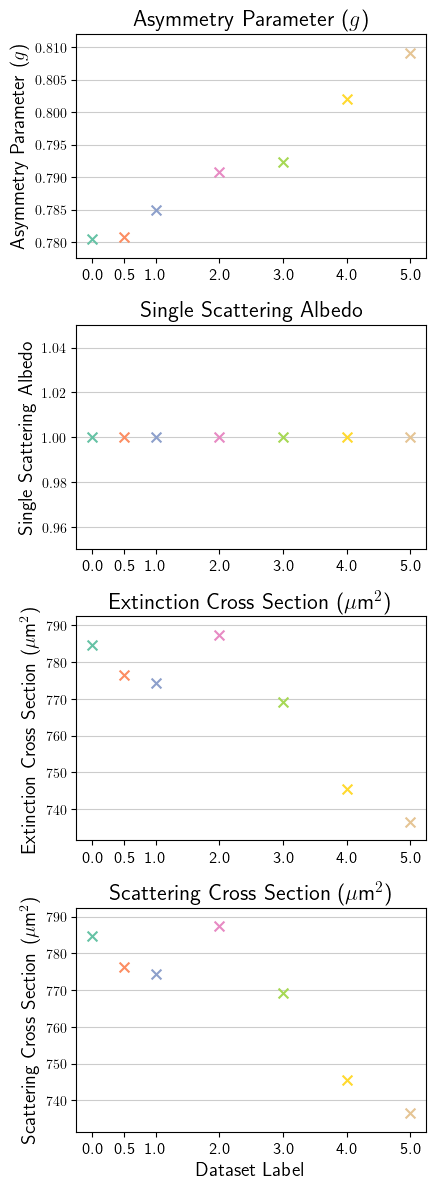

In [136]:
# Create a plot of the integrated scattering parameters


# Use LaTeX font
plt.rcParams.update({'text.usetex': True})

# Figure font config
label_font = {'fontfamily': 'Arial Black', 'fontsize': 14}
title_font = {'fontfamily': 'Arial Black', 'fontsize': 16}
text_font = {'family': 'Palatino Linotype', 'size': 12}

# Define parameters to plot
parameters = ['asymmetry', 'ssa', 'extinction_cs', 'scattering_cs']
parameter_labels = {
    'asymmetry': 'Asymmetry Parameter ($g$)',
    'ssa': 'Single Scattering Albedo',
    'extinction_cs': 'Extinction Cross Section ($\\mu$m$^2$)',
    'scattering_cs': 'Scattering Cross Section ($\\mu$m$^2$)'
}

# Function to extract a numeric value from dataset name for sorting
def extract_numeric_value(dataset_name):
    # Try to extract the last numeric part, including decimal points (e.g., "myvalue0.5.txt" -> returns 0.5)
    match = re.search(r'(\d+(\.\d+)?)(?!.*\d)', dataset_name)
    if match:
        return float(match.group(1))
    return 0  # Default value if no number found

# Create a figure with subplots for each parameter
fig, axs = plt.subplots(len(parameters) , 1, figsize=(5, 12))

# Process each parameter
for i, param in enumerate(parameters):
    ax = axs[i]
    
    # Get datasets that have this parameter
    datasets = []
    for subdir, params in scattering_params.items():
        if param in params:
            # Use the dataset label if available, otherwise use the directory name
            if 'dataset_labels' in locals() and subdir in dataset_labels:
                label = dataset_labels[subdir]
            else:
                label = subdir
                
            datasets.append((label, params[param], subdir))
    
    # Sort datasets by numeric value extracted from the label
    datasets.sort(key=lambda x: extract_numeric_value(x[0]))
    
    # Extract sorted data
    labels = [d[0] for d in datasets]
    values = [d[1] for d in datasets]
    subdirs = [d[2] for d in datasets]
    
    # # Create x positions (evenly spaced)
    # x_pos = list(range(len(datasets)))
    # Create x positions based on the extracted numeric value from the label
    x_pos = [extract_numeric_value(label) for label in labels]
    
    # Plot each dataset point with crosses
    for j, (x, y, label, subdir) in enumerate(zip(x_pos, values, labels, subdirs)):
        color_idx = j % len(cm.Set2.colors)
        
        # Plot the point
        ax.scatter(
            x, y, 
            color=cm.Set2(color_idx), 
            marker='x', 
            s=50,
            label=label,
            zorder=3  # Ensure points are above grid lines
        )
        
        # # Add label text - alternate left and right for better readability
        # ax.text(
        #     x, y, 
        #     extract_numeric_value(label), 
        #     fontdict=text_font, 
        #     color=cm.Set2(color_idx), 
        #     verticalalignment='bottom', 
        #     horizontalalignment='center'
        # )
    
    # Set axis labels and title
    ax.set_ylabel(parameter_labels[param], fontdict=label_font)
    ax.set_title(f'{parameter_labels[param]}', fontdict=title_font)
    
    # Hide x ticks since they're just indices
    # ax.set_xticks([])
    # Set x-tick labels to be the numeric value extracted from the label
    ax.set_xticks(x_pos)
    ax.set_xticklabels([extract_numeric_value(label) for label in labels], rotation=0, ha='center', fontdict=text_font)
    
    # Set appropriate y-axis limits
    if values:
        y_range = max(values) - min(values)
        ax.set_ylim(min(values) - y_range*0.1, max(values) + y_range*0.1)
    
    # Grid
    ax.grid(axis='y', color='black', alpha=0.1, zorder=0)
    
    # Add horizontal grid lines for better readability
    ax.yaxis.grid(True, linestyle='-', alpha=0.2)

# Only the bottom subplot needs an x label
axs[-1].set_xlabel('Dataset Label', fontdict=label_font)

# Adjust layout to make room for the text labels
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85, hspace=0.3)

# Set figure title
if 'constant_params' in locals() and constant_params:
    # Get wavelength if available
    wavelength = constant_params.get('-w', constant_params.get('--w', None))
    wavelength_str = f"$\\lambda = {wavelength}$ $\\mu$m, " if wavelength else ""
    
    # Get geometry file if available
    geo_file = constant_params.get('--geo', None)
    geo_str = f"{geo_file}, " if geo_file else ""
    
    # fig.suptitle(f"Scattering Parameters for {geo_str}{wavelength_str}", 
                #  fontdict=title_font, y=0.98)

# Save figure
plt.savefig('scattering_parameters_comparison.jpg', dpi=300)
plt.show()

/var/folders/gm/hm74nwpd4nsfxdphjf3hw96h0000gn/T/ipykernel_83002/3158229506.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


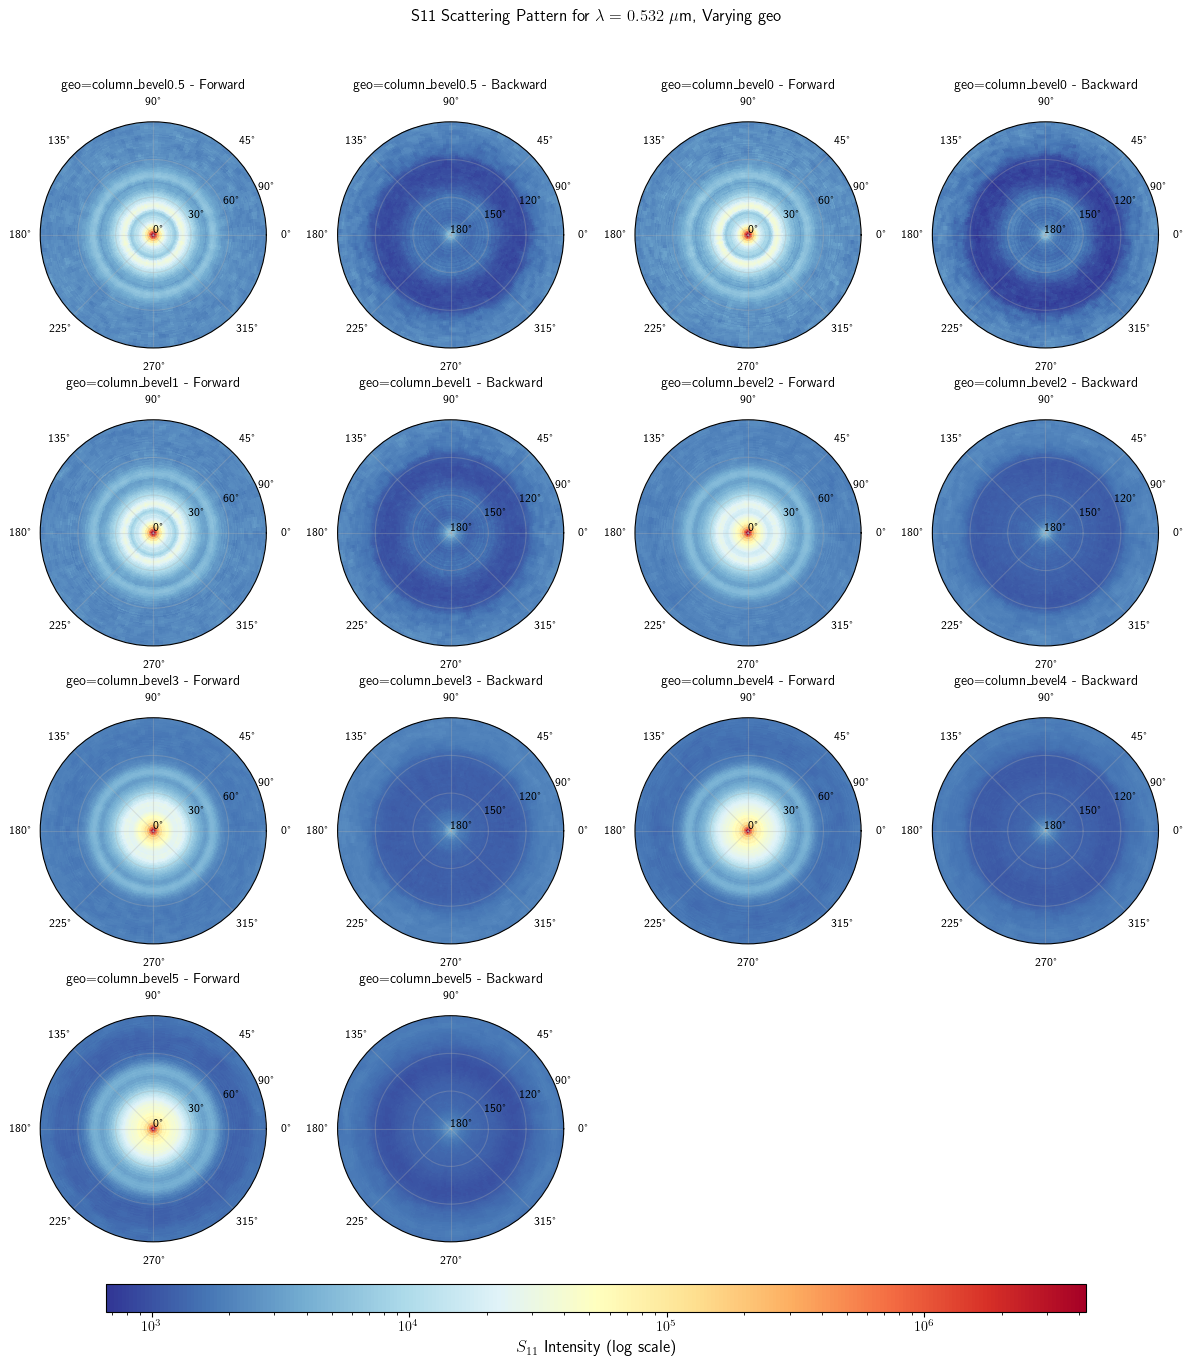

In [137]:
# Create a plot of the 2D S11 scattering pattern for each dataset, splitting into forward and backward scattering
import matplotlib.colors as mcolors

# Use LaTeX font
plt.rcParams.update({'text.usetex': True})

# Figure font config
label_font = {'fontfamily': 'Arial Black', 'fontsize': 12}
title_font = {'fontfamily': 'Arial Black', 'fontsize': 14}
subplot_title_font = {'fontfamily': 'Arial Black', 'fontsize': 10}

# S11 is in the third column (index 2) of the mueller matrix data
S11_col = 2

# Determine the grid size based on the number of datasets
num_datasets = len(mueller_data)
if num_datasets <= 2:
    rows, cols = 1, num_datasets * 2  # Each dataset gets 2 plots (forward + backward)
elif num_datasets <= 4:
    rows, cols = 2, num_datasets  # Each row has forward+backward for one dataset
else:
    rows = (num_datasets + 1) // 2
    cols = 4  # Each row has forward+backward for two datasets

# Create the figure with reduced horizontal padding
fig = plt.figure(figsize=(3.5*cols, 3.5*rows))

# Get parameter that varies for title
if len(varying_params) > 0:
    varying_param_name = next(iter(sorted(varying_params.keys()))).lstrip('-')
else:
    varying_param_name = "Dataset"

# Create overall figure title from constant parameters
if 'constant_params' in locals() and constant_params:
    # Get wavelength if available
    wavelength = constant_params.get('-w', constant_params.get('--w', None))
    wavelength_str = f"$\\lambda = {wavelength}$ $\\mu$m, " if wavelength else ""
    
    # Get geometry file if available
    geo_file = constant_params.get('--geo', None)
    geo_str = f"{geo_file}, " if geo_file else ""
    
    fig_title = f"S11 Scattering Pattern for {geo_str}{wavelength_str}Varying {varying_param_name}"
else:
    fig_title = "S11 Scattering Pattern Comparison"

# Add the overall title
fig.suptitle(fig_title, fontdict=title_font, y=0.98)

# First pass to determine the intensity range across all datasets
min_intensity = float('inf')
max_intensity = float('-inf')

for subdir, data in mueller_data.items():
    s11 = data[:, S11_col]
    # Handle zero or negative values
    s11[s11 <= 0] = 1e-10
    min_intensity = min(min_intensity, np.min(s11))
    max_intensity = max(max_intensity, np.max(s11))

# Adjust colormap limits to focus on lower intensities
# Set the vmin to the minimum value and vmax to a fraction of the maximum value 
vmin = min_intensity
vmax = max_intensity * 0.05  # Use only 5% of the maximum to enhance lower intensities

# Process each dataset
for i, (subdir, data) in enumerate(mueller_data.items()):
    # Extract theta, phi, and S11 values
    theta = data[:, 0]
    phi = data[:, 1]
    s11 = data[:, S11_col]
    
    # Handle zero or negative values (set to a small positive number for log scale)
    s11[s11 <= 0] = 1e-10
    
    # Create a grid of unique theta and phi values for plotting
    theta_unique = np.unique(theta)
    phi_unique = np.unique(phi)
    
    # Verify the data forms a complete grid (important for reshaping)
    if len(theta_unique) * len(phi_unique) != len(theta):
        print(f"Warning: Data for {subdir} does not form a complete grid. Skipping.")
        continue
    
    # Create the meshgrid
    theta_grid, phi_grid = np.meshgrid(theta_unique, phi_unique, indexing='ij')
    
    # Reshape the S11 data to fit the grid
    s11_grid = s11.reshape((len(theta_unique), len(phi_unique)))
    
    # Convert phi from degrees to radians for polar plotting
    phi_grid_rad = np.radians(phi_grid)
    
    # Use dataset label if available, otherwise use directory name
    if 'dataset_labels' in locals() and subdir in dataset_labels:
        label = dataset_labels[subdir]
    else:
        label = subdir
    
    # Create forward scattering subplot (0-90 degrees)
    ax_forward = fig.add_subplot(rows, cols, i*2+1, projection='polar')
    
    # Filter for forward scattering (0-90 degrees)
    forward_mask = theta_grid <= 90
    
    # Plot forward scattering using RdYlBu_r colormap with adjusted limits
    mesh_forward = ax_forward.pcolormesh(phi_grid_rad, theta_grid, np.where(forward_mask, s11_grid, np.nan),
                                         shading='auto', 
                                         cmap=cm.RdYlBu_r,
                                         norm=mcolors.LogNorm(vmin=vmin, vmax=vmax))
    
    # Set forward plot title
    ax_forward.set_title(f"{label} - Forward", fontdict=subplot_title_font)
    
    # Configure the forward polar plot
    ax_forward.grid(True, alpha=0.3)
    ax_forward.set_thetagrids(np.arange(0, 360, 45), fontsize=8)
    ax_forward.set_rlabel_position(22.5)  # Move radial labels to make room
    ax_forward.set_rgrids(np.arange(0, 90+1, 30), labels=[f"{x}°" for x in np.arange(0, 90+1, 30)], fontsize=8)
    ax_forward.set_rlim(0, 90)
    
    # Create backward scattering subplot (90-180 degrees)
    ax_backward = fig.add_subplot(rows, cols, i*2+2, projection='polar')
    
    # Filter for backward scattering (90-180 degrees)
    backward_mask = theta_grid >= 90
    
    # For backward scattering, we need to transform the theta values
    # 180° becomes 0° (center), 90° becomes 90° (edge)
    transformed_theta = 180 - theta_grid
    
    # Plot backward scattering with transformed coordinates using RdYlBu_r colormap
    mesh_backward = ax_backward.pcolormesh(phi_grid_rad, transformed_theta, np.where(backward_mask, s11_grid, np.nan), 
                                           shading='auto', 
                                           cmap=cm.RdYlBu_r,
                                           norm=mcolors.LogNorm(vmin=vmin, vmax=vmax))
    
    # Set backward plot title
    ax_backward.set_title(f"{label} - Backward", fontdict=subplot_title_font)
    
    # Configure the backward polar plot
    ax_backward.grid(True, alpha=0.3)
    ax_backward.set_thetagrids(np.arange(0, 360, 45), fontsize=8)
    ax_backward.set_rlabel_position(22.5)  # Move radial labels to make room
    
    # Set custom r-labels that show the actual scattering angles (90-180)
    ax_backward.set_rgrids(np.arange(0, 90+1, 30), 
                           labels=[f"{180-x}°" for x in np.arange(0, 90+1, 30)],
                           fontsize=8)
    ax_backward.set_rlim(0, 90)

# Add a colorbar at the bottom of the figure
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [x, y, width, height]
cbar = fig.colorbar(mesh_forward, cax=cbar_ax, orientation='horizontal')
cbar.set_label('$S_{11}$ Intensity (log scale)', fontdict=label_font)

# Reduce horizontal padding between subplots
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=-0.3)  # Reduced wspace for tighter horizontal spacing

# Save the figure
plt.savefig('mueller_2d_patterns_split.jpg', dpi=300)
plt.show()